# Prepare Data

Plan - Acquire - **Prepare** - Explore - Model - Deliver

## What we are doing and why:

**What:** Clean and tidy our data so that it is ready for exploration, analysis and modeling

**Why:** Set ourselves up for certainty! 

    1) Ensure that our observations will be sound:
        Validity of statistical and human observations
    2) Ensure that we will not have computational errors:
        non numerical data cells, nulls/NaNs
    3) Protect against overfitting:
        Ensure that have a split data structure prior to drawing conclusions

In [1]:
# ------------

## High level Roadmap:

#### **Input:** An aquired dataset (One Pandas Dataframe) ------> **Output:** Tidied and cleaned data split into Train,  Validate, and Test sets (Three Pandas Dataframes)

#### **Processes:** Summarize the data ---> Clean the data ---> Split the data

## Summarize

In [2]:
# imports
# numpy for vectorized operations
import numpy as np
# pandas for dataframe manipulation of tabular data
import pandas as pd
# matplotlib for visualizations
import matplotlib.pyplot as plt

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own acquire script:
import acquire

In [3]:
# Grab our acquired dataset:

In [4]:
df = acquire.get_titanic_data()

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
# take a look at our data:

In [7]:
df.shape

(891, 13)

In [8]:
df.head(5)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [9]:
#takeaways  from df head:
#survived is our targer -- it is not potential feature

# passenger id is probably inadvisable to keep in
#pclass and class appear to be the same thing
#embark_town and embarked appear to be the same thing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [11]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [12]:
# df.columns will give just the column names as strings
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'deck', 'embark_town', 'alone'],
      dtype='object')

In [13]:
df.columns[[df[col].dtype != 'O' for col in df.columns]]

Index(['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'alone'],
      dtype='object')

In [14]:
num_cols = df.columns[[df[col].dtype != 'O' for col in df.columns]]


In [15]:
 #df.select_dtypes(exclude=['object'])

In [16]:
#check
num_cols

Index(['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'alone'],
      dtype='object')

In [17]:
df.columns[[df[col].dtype == 'O' for col in df.columns]]

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

In [18]:
# describe object columns
obj_cols =  df.columns[[df[col].dtype == 'O' for col in df.columns]]

In [19]:
obj_cols

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

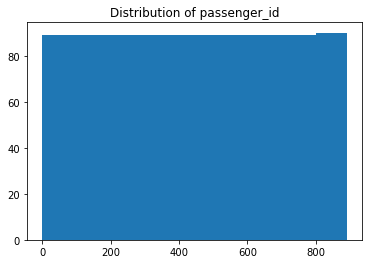

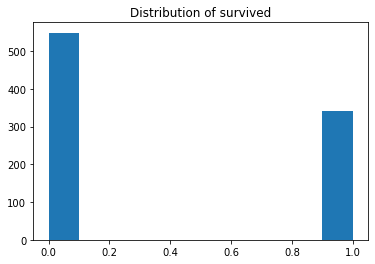

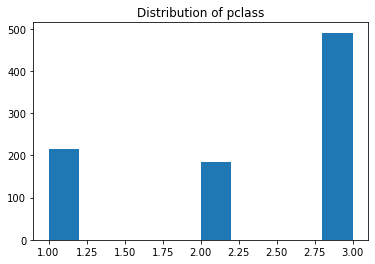

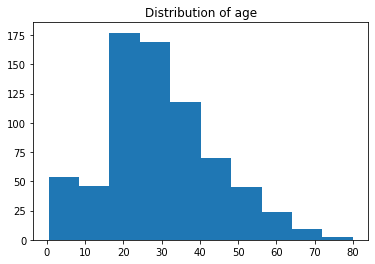

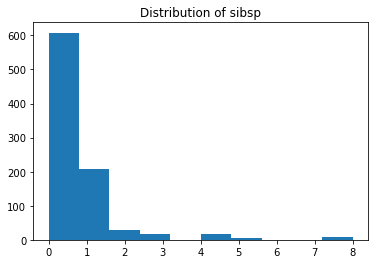

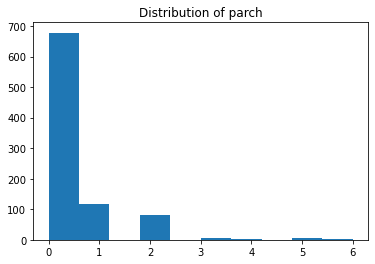

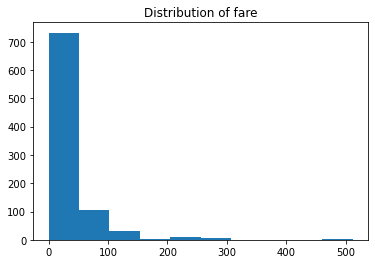

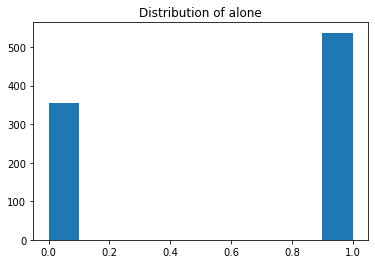

In [20]:
for col in num_cols:
    plt.hist(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [21]:
# Describe our object columns:
for col in obj_cols:
    print(df[col].value_counts())
    print('--------')
    print(df[col].value_counts(normalize = True, dropna =False))
    print('______________')

male      577
female    314
Name: sex, dtype: int64
--------
male      0.647587
female    0.352413
Name: sex, dtype: float64
______________
S    644
C    168
Q     77
Name: embarked, dtype: int64
--------
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
______________
Third     491
First     216
Second    184
Name: class, dtype: int64
--------
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
______________
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
--------
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
______________
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
--------
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64
______________


In [22]:
# missing values:
df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [23]:
missing = df.isnull().sum()
missing 

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [24]:
#just the missing values
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

#### Gather our takeaways, i.e., what we are going to do when we clean:

1. embarked == embark_town. Pick one to keep since they are dupicates.  We'll keep embarked_town for now since it is more human readable.

2. class == pclass.  They say the same thing, so let's keep the one that is numerical.

3. deck and age have many missing values.  Deck will be of no use to us with that many missing values and we will say the same of age without more insight. We will drop these columns.

4. We have just two values missing from embark_town, and we will fill these in with the most common embark_town category

5. For embark_town and sex, we will encode the values

## Clean

In [25]:

# drop duplicates...run just in case

In [26]:
#alternatively: df = df.dropduplicates()
df.drop_duplicates(inplace=True)

In [27]:
#see is anything was dropped
df.shape

(891, 13)

In [28]:
df.head(1)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.25,S,Third,NaN,Southampton,0


In [29]:
# drop columns with too many missing to have any value right now
# drop columns that duplicate data

In [30]:
columns_to_drop = ['deck', 'age', 'embarked', 'class']

In [31]:
df = df.drop(columns=columns_to_drop)

In [32]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


We could fill embark_town with most common value, 'Southampton', by hard-coding the value using the fillna() function, as below. Or we could use an imputer. We will demonstrate the imputer *after* the train-validate-test split. 

In [33]:
#just to check the change we are going to do next
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   embark_town   889 non-null    object 
 8   alone         891 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 69.6+ KB


In [34]:
df['embark_town'] = df.embark_town.fillna(value = 'Southampton')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   embark_town   891 non-null    object 
 8   alone         891 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 69.6+ KB


In [36]:
#check this
pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [37]:
dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na=False, drop_first=[True, True])

In [38]:
# Let's make that into a function so we can repeat it all easily in one step.

In [39]:
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [40]:
#rows: r0ws
#cols :co1s

df = pd.concat([df, dummy_df], axis =1)
    

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   sex                      891 non-null    object 
 4   sibsp                    891 non-null    int64  
 5   parch                    891 non-null    int64  
 6   fare                     891 non-null    float64
 7   embark_town              891 non-null    object 
 8   alone                    891 non-null    int64  
 9   sex_male                 891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(6), object(2), uint8(3)
memory usage: 72.2+ KB


Create a function to perform these steps when we need to reproduce our dataset. 

In [42]:
# we need to acquire again a df
df = acquire.get_titanic_data()

In [43]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [45]:
def clean_titanic_data(df):
    '''
    takes in a datafram of the titanic dataset as it is acquired and return a cleaned
    dataframe arguments: df: a panda DataFrame with the expected featrure names and columns
    return: clean_df: a dataframe with the cleaning operations performed on it
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['sex', 'embark_town'])

In [46]:
cleaned_df_v0 = clean_titanic_data(df)

In [47]:
cleaned_df_v0.head()

,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,1,0,71.2833,0,0,0,0
2,2,1,3,0,0,7.9250,1,0,0,1
3,3,1,1,1,0,53.1000,0,0,0,1
4,4,0,3,0,0,8.0500,1,1,0,1


In [48]:
cleaned_df_v0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone                    891 non-null    int64  
 7   sex_male                 891 non-null    uint8  
 8   embark_town_Queenstown   891 non-null    uint8  
 9   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 58.3 KB


## Train, Validate, Test Split

In [49]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(cleaned_df_v0, test_size=0.2, random_state=1349, stratify=cleaned_df_v0.survived)
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.survived)

## Option for Missing Values: Impute

We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.  

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent'). 
2. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object. 
3. Transform train: fill missing values in train dataset with that value identified
4. Transform test: fill missing values with that value identified

1. Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (`mean`, `median`, `most_frequent`). Essentially, this is creating the instructions and assigning them to a variable we will reference.  

In [50]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=None)

In [51]:
type(imputer)

sklearn.impute._base.SimpleImputer

2. `Fit` the imputer to the columns in the training df.  This means that the imputer will determine the `most_frequent` value, or other value depending on the `strategy` called, for each column.   

In [52]:
# ******* Get fresh Titanic data to use  ***********

In [53]:
df = acquire.get_titanic_data()

In [54]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [55]:
df.shape

(891, 13)

In [56]:
df = df.drop_duplicates()
df = df.drop(columns=['deck', 'embarked', 'class', 'age'])


In [57]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on survived.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.survived)
    return train, validate, test

In [58]:
train, validate, test = split_data(df)

In [59]:
df.shape, train.shape, validate.shape , test.shape

((891, 9), (498, 9), (214, 9), (179, 9))

In [60]:
train.embark_town.value_counts(dropna = False)

Southampton    354
Cherbourg      102
Queenstown      41
NaN              1
Name: embark_town, dtype: int64

In [61]:
train['embark_town'] = train.embark_town.replace(np.nan, None)

In [62]:
train.embark_town.value_counts(dropna = False)

Southampton    355
Cherbourg      102
Queenstown      41
Name: embark_town, dtype: int64

In [63]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

In [64]:
imputer = imputer.fit(train[['embark_town']])

In [65]:
type(imputer)

sklearn.impute._base.SimpleImputer

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  498 non-null    int64  
 1   survived      498 non-null    int64  
 2   pclass        498 non-null    int64  
 3   sex           498 non-null    object 
 4   sibsp         498 non-null    int64  
 5   parch         498 non-null    int64  
 6   fare          498 non-null    float64
 7   embark_town   498 non-null    object 
 8   alone         498 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 38.9+ KB


3. It will store that value in the imputer object to use upon calling `transform.` We will call `transform` on each of our samples to fill any missing values.  

In [67]:
train[['embark_town']] = imputer.transform(train[['embark_town']])
validate[['embark_town']] = imputer.transform(validate[['embark_town']])
test[['embark_town']] = imputer.transform(test[['embark_town']])

Create a function that will run through all of these steps, when I provide a train and test dataframe, a strategy, and a list of columns. 

In [68]:
def impute_mode(train, validate, test):
    '''
    impute mode for embark_town
    '''
    imputer = SimpleImputer(strategy='most_frequent', missing_values= np.nan)
    train[['embark_town']] = imputer.fit_transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    return train, validate, test

In [69]:
impute_mode(train, validate, test)

(     passenger_id  survived  pclass     sex  sibsp  parch      fare  \
 583           583         0       1    male      0      0   40.1250   
 165           165         1       3    male      0      2   20.5250   
 50             50         0       3    male      4      1   39.6875   
 259           259         1       2  female      0      1   26.0000   
 306           306         1       1  female      0      0  110.8833   
 ..            ...       ...     ...     ...    ...    ...       ...   
 313           313         0       3    male      0      0    7.8958   
 636           636         0       3    male      0      0    7.9250   
 222           222         0       3    male      0      0    8.0500   
 485           485         0       3  female      3      1   25.4667   
 744           744         1       3    male      0      0    7.9250   
 
      embark_town  alone  
 583    Cherbourg      1  
 165  Southampton      0  
 50   Southampton      0  
 259  Southampton      0  

Blend the clean, split and impute functions into a single prep_data() function. 

In [70]:
def prep_titanic_data(df):
    '''
    takes in a dataframe of the titanic dataset as it is acquired and returns a cleaned dataframe
    arguments: df: a pandas DataFrame with the expected feature names and columns
    return: train, test, split: three dataframes with the cleaning operations performed on them
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age', 'passenger_id'])
    train, test = train_test_split(df, test_size=0.2, random_state=1349, stratify=df.survived)
    train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.survived)
#     print(train.info())
#     return train, validate, test
    train, validate, test = impute_mode(train, validate, test)
    dummy_train = pd.get_dummies(train[['sex', 'embark_town']], drop_first=[True,True])
    dummy_validate = pd.get_dummies(validate[['sex', 'embark_town']], drop_first=[True,True])
    dummy_test = pd.get_dummies(test[['sex', 'embark_town']], drop_first=[True,True])
    train = pd.concat([train, dummy_train], axis=1)
    validate = pd.concat([validate, dummy_validate], axis=1)
    test = pd.concat([test, dummy_test], axis=1)
    train = train.drop(columns=['sex', 'embark_town'])
    validate = validate.drop(columns=['sex', 'embark_town'])
    test = test.drop(columns=['sex', 'embark_town'])
    return train, validate, test

In [71]:
df = acquire.get_titanic_data()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [73]:
train, validate, test = prep_titanic_data(df)

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 474 to 94
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 28.7 KB


In [75]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 569 to 845
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 214 non-null    int64  
 1   pclass                   214 non-null    int64  
 2   sibsp                    214 non-null    int64  
 3   parch                    214 non-null    int64  
 4   fare                     214 non-null    float64
 5   alone                    214 non-null    int64  
 6   sex_male                 214 non-null    uint8  
 7   embark_town_Queenstown   214 non-null    uint8  
 8   embark_town_Southampton  214 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 12.3 KB


In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 691 to 799
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 179 non-null    int64  
 1   pclass                   179 non-null    int64  
 2   sibsp                    179 non-null    int64  
 3   parch                    179 non-null    int64  
 4   fare                     179 non-null    float64
 5   alone                    179 non-null    int64  
 6   sex_male                 179 non-null    uint8  
 7   embark_town_Queenstown   179 non-null    uint8  
 8   embark_town_Southampton  179 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 10.3 KB


## Exercises

The end product of this exercise should be the specified functions in a python script named `prepare.py`.
Do these in your `classification_exercises.ipynb` first, then transfer to the prepare.py file. 

This work should all be saved in your local `classification-exercises` repo. Then add, commit, and push your changes.

Using the Iris Data:  

1. Use the function defined in `acquire.py` to load the iris data.  

1. Drop the `species_id` and `measurement_id` columns.  

1. Rename the `species_name` column to just `species`.  

1. Create dummy variables of the species name. 

1. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.  